# Cenovus conversation
2024-08-02

Prompted by: Christopher Ewanik \
Material by: Vikas Dhiman, University of Maine, Orono

## General Career and Guidance 



1. Financial motivation

2. You have hit a ceiling in your career:

3. You have been good at school and all your teachers told you to do graduate school.

4. Desire to learn, to know more, to be an expert at what you do.

Chris: Decision to go to grad school, what to study, Industry vs Academia

Vikas:
There are several motivations to go to grad school, some obvious, some twisted, some deep. Let’s address them one by one.

### Financial motivation:
The good thing about financial motivation is that it puts numbers on all the decisions. You can compute the expected average earnings with or without grad school and make the decision whichever is greater.

U.S. Bureau of Labor Statistics (BLS) releases a report every year titled “Education pays”. The [2023 year data](https://www.bls.gov/careeroutlook/2024/data-on-display/education-pays.htm) puts the “weakly usual earnings” for Bachelor’s degree at USD 1,493 per week; for master’s degree at USD 1,797; and USD 2,109 for PhD degree. [A georgetown university report from 2021](https://cew.georgetown.edu/wp-content/uploads/cew-college\_payoff\_2021-fr.pdf) compares lifetime earnings and finds the same conclusion on an average, but also notes that the spread is wide. For example, the top 16% of associate degree holders earn more than the bottom 50% of the bachelor degree holders. But you can do better than just looking at the averages. An average graduate from MIT earns twice the salary than a University of Maine graduate. So research about the program you get into; what is their average salary; what is my current salary; what would be my salary two years from now; what would be my student loan after the graduate degree. Factor them all in your financial decision making.

### You have hit a ceiling in your career:
You cannot get certain jobs that you want without a Masters or a PhD degree. This is a no brainer; I wanted to become a researcher and most research jobs in academia or industry require a PhD degree. What you want to introspect is whether you want that new shining job or not, you know, grass is always greener on the other side.

### You have been good at school and all your teachers told you to do graduate school.
Typically being good at something is tightly correlated with motivation to want to do something; but it can come with all kinds of psychological traps. If you are good at school, then school is a place where you get a regular pat on the back for being better than others. Schools can encourage approval seeking from father figures. This can be damaging when you run into occasional failures. A healthy psychological state is where you are driven by intrinsic motivation to make the world a better place; rather than getting grades as treats from your teachers. 

### Curiosity, desire to learn, to know more, to be an expert at what you do.
This might be the most benign or the most evil desire depending on how you see it. On one hand we eulogize the philosophers who live and die for the love of knowledge and expertise; we respect and envy the nerds at our workplaces who seem to know everything. On the other hand, this is also a desire to be better than others, to politely correct people who do not know as much as you do; desire to show off your expert knowledge. It’s kind of a mild narcissism. However, self-awareness of your narcissism can go a long way toward redirecting it to the good of the society (or at least the people around you). If the desire to learn is your motivation to go to grad school, it is a much more complicated story. You can learn without grad school; knowledge is free on the internet; on youtube and on textbooks. Also, you can graduate from a grad school without learning.

## Intro to ML 

![](./media/least-sq-stubs.png)

If you know nothing, how should you understand ML, super basics of neural networks and predictive modelling, concepts to know (Algs, stats, linear algebra, calculus, etc)

If you remember linear regression from your undergraduate statistics class, that is the simplest form of and the main idea behind machine learning.  When you have a bunch of data points and you fit a line through these points, you can get y value for any x value, not just the x values for which we know the y values.

### What are machines actually learning in machine learning?

Consider a function that you wrote in your computer science class? Fibonacci series, factorial or prime numbers? BTW the programming language functions are different from math functions. Computer programmers call the math functions as pure functions, functions without side-effects. These terms will be familiar to functional programming enthusiasts.

A typical programming 101 assignment is to code fibonacci series:
$$f_0 = 0$$
$$f_1 = 1$$
$$f_n = f_{n-1} + f_{n-2}, \text{ for all } n \ge 2$$

In [1]:
def fibonacci(n):
    return (fibonacci(n-1) + fibonacci(n-2)) if n >= 2 else n

In [2]:
for i in range(10):
    print(f"{i}, {fibonacci(i)}")

0, 0
1, 1
2, 1
3, 2
4, 3
5, 5
6, 8
7, 13
8, 21
9, 34


The question is, can we actually "learn" this function, intead of writing it? What does it mean to learn the function? A programmer typically writes a function that has inputs, for example, the fibonacci series above. But *machine learning* is the problem of finding the function from input output pairs alone.

```mermaid
flowchart LR
    A(Input) -->|Function code| B(Output)
    C("Data:\n(Input, Output)") -->|Machine Learning| D(Function representation)
    E(New Input) --> D 
    D --> F(New Output)
```

In [3]:
%%writefile data.csv
0, 0
1, 1
2, 1
3, 2
4, 3
5, 5
6, 8
7, 13
8, 21
9, 34

Overwriting data.csv


In [4]:
import numpy as np
fibonacci_data = np.loadtxt("data.csv", delimiter=",")
fibonacci_data

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  2.],
       [ 4.,  3.],
       [ 5.,  5.],
       [ 6.,  8.],
       [ 7., 13.],
       [ 8., 21.],
       [ 9., 34.]])

Let's plot the fibonacci data.

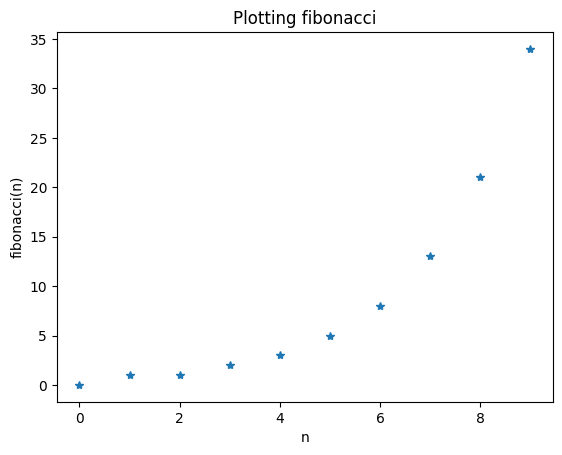

In [5]:
ndata = fibonacci_data[:, 0]
ydata = fibonacci_data[:, 1]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.plot(ndata, ydata, '*')
_ = ax.set(xlabel='n', ylabel='fibonacci(n)', title='Plotting fibonacci')

It looks to be increasing faster than a line. It can be a quadratic, cubic, or exponential. (Actually I know that fibonacci series follows an exponential curve; look up golden spiral). Let's try an exponential approximation. To do that plot the fibnacci function on log axis.

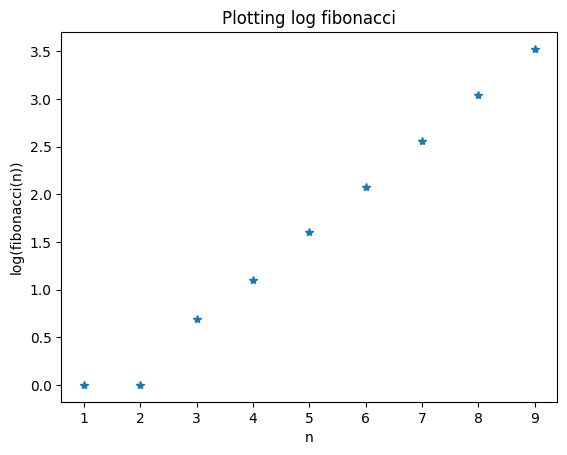

In [6]:
fig, ax = plt.subplots()
ax.plot(ndata[1:], np.log(ydata[1:]), '*')
_ = ax.set(xlabel='n', ylabel='log(fibonacci(n))', title='Plotting log fibonacci')

It looks pretty much linear in log domain. Let's just fit a line to it using $y = m  n + c$.

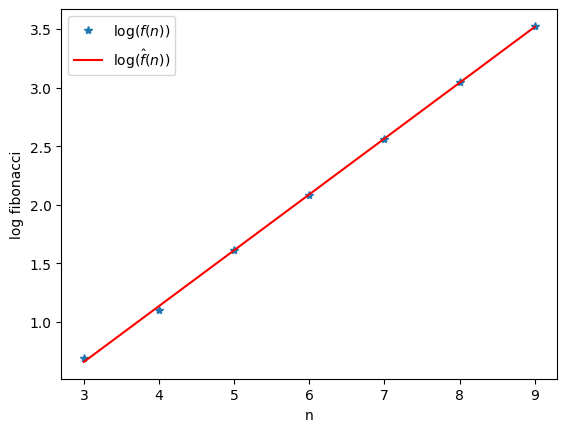

In [7]:
import operator
# You will learn about this function in a Linear Algebra course
# Gilbert Strang's course and textbook on MIT open-courseware are highly recommended
# https://ocw.mit.edu/courses/18-06-linear-algebra-spring-2010/
mc, *_ = np.linalg.lstsq(np.vstack((ndata[3:], np.ones_like(ndata[3:]))).T, np.log(ydata[3:]))

m, c =  map(operator.methodcaller('item'), mc)
fig, ax = plt.subplots()
ax.plot(ndata[3:], np.log(ydata[3:]), '*', label=r'$\log(f(n))$')
ax.plot(ndata[3:], m*ndata[3:]+c, 'r-', label=r'$\log(\hat{f}(n))$')
ax.set(xlabel='n', ylabel='log fibonacci')
_ = ax.legend()

Convert it back to the exponential domain. This fit looks very good.

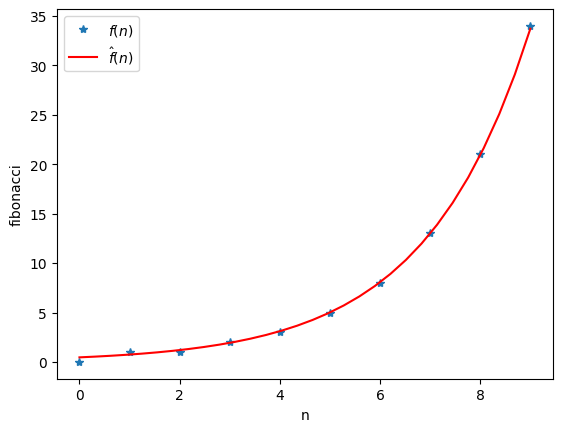

In [8]:
def plot_learned(ndata, ydata, fhat):
    fig, ax = plt.subplots()
    ax.plot(ndata, ydata, '*', label=r'$f(n)$')
    x = np.linspace(ndata[0], ndata[-1], 30)
    ax.plot(x, fhat(x), 'r-', label=r'$\hat{f}(n)$')
    ax.set(xlabel='n', ylabel='fibonacci')
    _ = ax.legend()
plot_learned(ndata, ydata, lambda x: np.exp(m*x+c))

In [9]:
import math
def fibonacci_learned(n): return math.exp(m*n+c)
def fibonacci(n):
    return (fibonacci(n-1) + fibonacci(n-2)) if n >= 2 else n
fibonacci_learned(14), fibonacci(14)

(365.5809849436904, 377)

Congratulations you have created a small neural network. In neural network terminology, $x$ is the inputt, $m$ is a weight $c$ is a bias and $\exp(.)$ is called an activation function.

```mermaid
flowchart LR
    X((x)) -->|m| F(("f"))
    O((1)) -->|c| F
```
$$f = \exp(m x + c)$$

Now we have two version of the same function, a learned function and a hand-coded function. Note that the learned function has two parts, the structure/architecture of the function (we knew that fibonacci is exponential) and the weights ($m$, $c$) that we found from the data.

But we often do not know what architecture of the function is, and we can not often transforms inputs or the outputs to a linear fit. What do we do then? The main idea is to make the structure so complex that it can handle almost any function that the true function can be.

To make a more complex architecture, we will use a simpler "activation function" than exponential to figure out our fibonacci function. This function is called ReLU function.

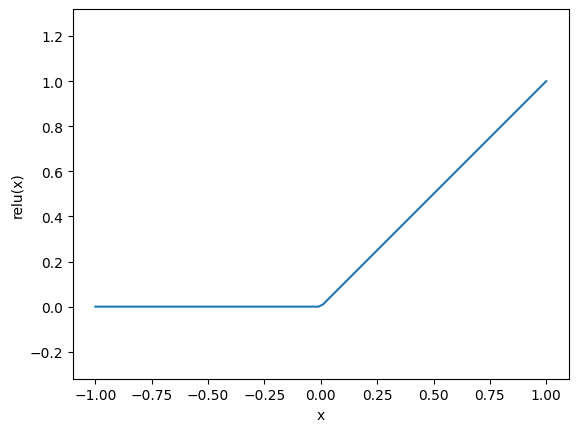

In [10]:
def relu(x):
    return np.where(x > 0, x, 0)

fig, ax = plt.subplots()
x = np.linspace(-1, 1, 100)
ax.plot(x, relu(x))
ax.axis('equal')
_ = ax.set(xlabel='x', ylabel='relu(x)')

In [11]:
class WeightEncoder:
    def __init__(self, h):
        self.h = h

    def decode(self, w):
        h = self.h
        b1 = w[0]
        w1 = w[1:h+1, None]
        b2 = w[h+1]
        w2 = w[h+2:2*h+2]
        return (b1, w1, b2, w2)

    def encode(self, cs_ws):
        (b1, w1, b2, w2) = map(operator.methodcaller('flatten'), cs_ws)
        return np.hstack((b1, w1, b2, w2))
       
    def wsize(self):
        return 2*self.h+2

We will create a more complex architecture. We will have two "layers" in this architecture. The first layer output is denoted as $h_1$ (its called a hidden unit) and eventual output is denoted as $f$.

```mermaid
flowchart LR
    X((x)) -->|w1| F1((h1))
    F1 -->|w2| F((f))
    O1((1)) -->|b1| F1
    O2((1)) -->|b2| F
```
$$h_1 = \text{ReLU}(w_1 x + b_1)$$
$$f = w_2 f_1 + b_2 = w_2  \text{ReLU}(w_1 x + b_1) + b_2$$

In [12]:
def fibonacci_layer_one(n, w, h=1):
    b1, w1, b2, w2 = WeightEncoder(h).decode(w)
    return relu(w1 @ n[None, :] + b1)
    
def fibonacci_complex_structure(n, w, h=1):
    b1, w1, b2, w2 = WeightEncoder(h).decode(w)
    return w2 @ fibonacci_layer_one(n, w, h=h) + b2

def error(ndata, ydata, w, h=1):
    return ((ydata - fibonacci_complex_structure(ndata, w, h=h))**2).mean()

# We can no longer use Linear Algebra; we have to use some non-linear optimization technique
# Stephen Boyd's book and lectures at Stanford are a great resource
# https://web.stanford.edu/~boyd/cvxbook/
# https://www.youtube.com/watch?v=McLq1hEq3UY
from scipy.optimize import minimize
from functools import partial
h=1
np.random.seed(0)
res = minimize(partial(error, ndata, ydata, h=h), np.random.rand(WeightEncoder(h).wsize())*6-1)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.390000000008983
        x: [-1.799e+02  3.660e+01  1.400e+00  1.940e-01]
      nit: 31
      jac: [ 4.768e-07  1.311e-06  1.192e-07  8.821e-06]
 hess_inv: [[ 1.500e+00 -2.503e-01 -1.310e-01 -3.778e-04]
            [-2.503e-01  4.788e-02 -3.030e-02  1.641e-04]
            [-1.310e-01 -3.030e-02  7.701e-01 -6.166e-03]
            [-3.778e-04  1.641e-04 -6.166e-03  1.750e-04]]
     nfev: 250
     njev: 50

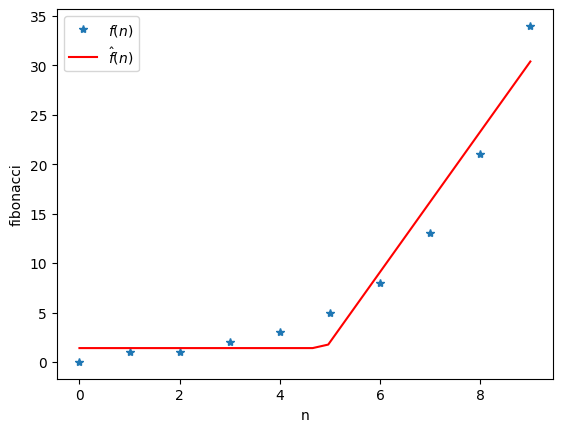

In [13]:
wopt = res.x
plot_learned(ndata, ydata, partial(fibonacci_complex_structure, w=wopt, h=h))

This fits the data okayish, but not that well. Can we make the architecture a little bit more complex? What if we increase the number of functions in the first layer. I have dropped $b_1$ and $b_2$ for clarity. Otherwise there would be too many arrows.

```mermaid
flowchart LR
    X((x)) -->|w11| F1((h1))
    X((x)) -->|w12| F2((h2))
    X((x)) -->|w13| F3((h3))
    F1 -->|w21| F((f))
    F2 -->|w22| F((f))
    F3 -->|w23| F((f))
```
$$h_1 = \text{ReLU}(w_{11} x + b_1), \qquad h_2 = \text{ReLU}(w_{12} x + b_1), \qquad h_3 = \text{ReLU}(w_{13} x + b_1)$$
$$f = w_{21} h_1 + w_{22} h_2 + w_{23} h_3 + b_2 $$

The intermediate functions $h_1$, $h_2$, $h_3$ are called hidden units or activations of the first layer and $w_{11}, w_{12}, w_{13}$ are the weights of first layer and $w_{21}, w_{22}, w_{23}$ are weights of the second layer.

In [14]:
h = 3
np.random.seed(11)
res = minimize(partial(error, ndata, ydata, h=h), np.random.rand(WeightEncoder(h).wsize())*6-1)

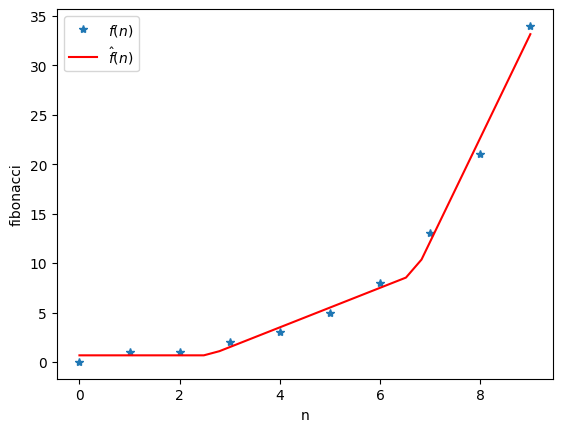

In [15]:
wopt = res.x
plot_learned(ndata, ydata, partial(fibonacci_complex_structure, w=wopt, h=h))

It is incredible if you keep scaling up the number of layers and number of acitivations, you can solve more and more complex problems. For example, here is the network architecture that can classify handwritten digits. It takes in a 28x28 pixels image, flattten it to 784 inputs, has three layers, with 16  hidden units in the first layer and second layer and 10 layers in the outputs. Each edge shown in the network is a weight and biases are not shown. 

![](media/mlp.gif)

Source: 3blue1brown

The total number of weights in this network are

In [16]:
784*16 + 16*16 + 16*10

12960

If each weight is stored at a float64 it would take 12kB of space to store all the weights. Such a network is considered small. LLama3.1 contains 403 billion weights, spread in 126 more-complex layers; requiring 403 GB if stored in float64 (but they are not, float16 is more common these days). 

#### Minimization

![](media/gradient-descent.gif)
![](media/derivative-descent.webp)

Source: Lili Jiang's medium post https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c
Source: Rekha M's clairvoyant blog https://blog.clairvoyantsoft.com/the-ascent-of-gradient-descent-23356390836f

### More resources for deep learning and neural networks

* Mathematics for Machine Learning. Marc Peter Deisenroth A. Aldo Faisal Cheng Soon Ong https://mml-book.github.io/book/mml-book.pdf 
* PATTERNS, PREDICTIONS, AND ACTIONS by Moritz Hardt and Benjamin Recht https://mlstory.org/ 
* Understanding Deep Learning - Simon J.D. Prince https://github.com/udlbook/udlbook/releases/download/v.1.18/UnderstandingDeepLearning_24_12_23_C.pdf 
* Deep Learning by Ian Goodfellow, Yoshua Bengio, Aaron Courville. (Available here: https://www.deeplearningbook.org/  )
* Machine Learning: A Probabilistic Perspective by Kevin P. Murphy (Available here: https://github.com/probml/pml-book/releases/latest/download/book1.pdf )
* Pattern Recognition and Machine Learning, Christopher Bishop, (Available here: https://www.microsoft.com/en-us/research/publication/pattern-recognition-machine-learning )

## What background to learn to be good at AI

#### Math
- Linear algebra: allows to manage large number of weights as matrices and vectors for addition and multiplication
- Multi-variate Calculus: To find the derivatives and gradients
- Probability and statistics: To understand randomness in your answers
- Optimization: Builds upon calculus to find the weights the error is the smallest
- Information theory: Builds upon probability and statistics on how to manage information.

#### Computer science/engineering
- Algorithms and data structures: How to think about storing and transforming data in computer memory?
- High performace computing and parallelization: How to make computers do math faster?
- Numerical methods: How to make computer do math more accurately?

Some students say they are good at programming but not good at math. I tell them that programming has been proven to be equivalent to Math in 1969 by Curry-Howard correspondence. The correspondence says that math proposition correspond to programming types (or classes); and proofs correspond to functions that convert between types. In fact, the latest AI by deepmind, AlphaProof, uses a programming language called Lean, that was developed for automated theorem prooving. In Lean programming language, different libraries expose math theories; while and you can write new proofs using existing theorems by importing them from libraries. The analogies between math and programming are made explicit by programming languages like Lean; and other functional programming languages.

It is not that a different kind of brain is required for math or programming, it is that you have not explored math as rigrously you have explored programming. Also a reminder that Alan Turing was trained as a mathematician; as well as his contemporary computer scientists like Alonzo Church (of course, computer science was not a discipline back then). 

## Advice for Students and learning

Online resources are great. However, one pitfall is that our attention economy rewards online teachers that dumb down material and make people feel that they have learned something even if they have kept the deepest secrets hidden from you. The most popular material on youtube is most likely addressed to the broadest audience and covers the topic in least depth. This is a great starting point, but it should not be the end point. To learn something deeply, seek how the smartest teachers are teaching the smartest students. And you would find that in MIT courseware. When you are setting a standard for your learning, make sure you go get the textbooks on a topic that MIT open-courseware is recommending, make sure you can do the exercises in their coursework.

In the end, coursework is not going to make you an expert, but doing projects will make you an expert. A coursework is intended to expose you different ideas, but when you are doing projects, you get to dive deeper into a topic. Whatever you use in your project, do not be satisified by just using it, dive deeper; what is the idea, where did it come from, why does it work, how does it work. Be curious, know things deeply, read the original manual, primary sources and you will be an expert. 

Pick your battles but do not limit yourself to disciplinary boxes. Computer science, data science, computer engineering, mathematics, physics, economics, business, psychology, philosophy, biology, sociology; these are all convinient boxes that we have created to manage knowledge. It is almost impossible for a person to learn everything in their lifetime, so one has to pick their own battles. But the knowledge that is the most useful to you or to your project rarely fits neatly into departmental boxes. When you run into something that you do not know and it is being used in your project learn about it. Don't worry if belongs to another department.

If I come accross a new concept, I try to relate it to closes concept I know. I find the difference and similarities between this and the closest concept I know. If it is similar, with a very small differences, then I do not explore the idea in detail. But if it is too different, then I try to go deeper by finding where did this idea come from and how did people come up with it.

## My Research 
Chris: (People are super excited about your research interests!!) – a general overview of your research interests (particularly Robotic perception, Autonomous safe navigation, Computer Vision, Reinforcement Learning, Machine Learning and Artificial Intelligence ), Talk about why you’re in it, what excites you, some of the research you’re proud of, how you stay current in the field, what trends you see in the next 5-10 years.

Vikas: 

```mermaid
flowchart LR
    A(Camera) -->|Perception| B(Internal model)
    B -->|Planning| C(Path to follow)
    C -->|Control| D(Actions to follow the path)
    D --> E(Steering, Brake, Acceleration)
    A -->|Reinforcement Learning| D
```

I started my PhD with work on what is called SLAM. It is the problem of making a robot see and understand the word around them. For example, if you have a robot with camera or a laser scanner, how to construct 3D model of the word around the robot and also how to locate the robot itself in that 3D model. There are different research  questions around building these 3D models; how much detail should we build in; does the detail depends on the task the robot is assigned to do; how to customize the model automatically for a given set of tasks.

When we divide the problems of robotic algorithms, into perception, planning and control; the robotic perception does not take into account what tasks the robot is going to do. However, Reinforcement learning is the opposite of that. RL is inspired from Pavlovian behavioral theory; you can train a pigeon to do tricks by just giving it treats. The most ambitious idea behind RL is to train from pixels to actions; the robot is driving a car; it gets camera images as inputs and outputs break, acceleration and stearing as output. Train it to drive a car by punishing it when it crashes and giving the robot a treat when it reaches the destination. However, people have tried this pixel to action RL with big datasets, big networks and big GPUs and so far it has not worked. So people are now trying a mixture of techniques, with old school SLAM and combining it with RL in different ways.

RL also forced me to learn more about control which lead me to research on safe control. As a part of my post-doc, I wrote a paper on uncertainty-aware safe control, which was pretty cool for me.

As a professor, I am working on several directions (1) How to improve NeRFs for SLAM (2) How to make very light-weight maps that store minimum amount of information, and (3) how to get provably-safe uncertainty information out of neural networks? (4) How to predict chlorophyll content of a plant from its images?

I am literally (a lover of knowledge), a philosopher. I love solving hard problems, I love to think deeply about things. As a series of life accidents I am a robotisict. I chose more to be a professor than to be a robotics professor. I like the freedom to choose your own adventure part of being a professor. But I like the field of AI. AI is all about automation; and I think automation of everything that a human can do, is the pinacle of all human knowledge. In the hierarchy from atoms, molecules, proteins, cells, neurons and brain; autotmation is a mechanistic replica for what brain can do. I have always hoped that we can understand the AI and automation that we are building rather than accidently stumble into by just building larger models. But hey we can bring understanding later if my hope prove wrong.

Staying current in the field is hard. You do the best you can, read as many papers you can, follow smart people; what are they reading and what are they writing. If there is something important that you missed, hopefully, it would be broadly adopted and trickle down to you in a few months if not a few years. 

Broad trends in next 5-10 years. Future is hard to predict, but you can look back 5 years and see what has changed what has not. AlexNet is 12 years old, AlphaGo is 9 years old, Transformers is 7 years old, BERT is 6 years old, GPT-2 (too dangerous to be released) is 5 years old, ChatGPT is 2 years old. 

After the hyper over artificial general intelligence dies down, I think we are going to make a reversal towards specialized artificial intelligence. A colleague of mine was suggesting using ChatGPT to read scanned transcripts for student admissions and match admission essays to scholarships. My claim was that anything worth doing repeatedly, that ChatGPT can do, we can build a specialized AI that can do it better. An AI to match admission essays to scholarship descriptions; another specialized AI extract expected information out of scanned trascripts. 

I work on provable safe control; because I believe we will need more guarantees of performance from neural networks not just a few good answers. The questions of trust, reliability and interpretability will be major question in AI.

In the area of self driving cars, I trust no one more the Rodney Brooks. He has made some predictions about self driving and robotics in 2018 and he has been reveing them every year.

## Ethics 
Chris: Ethical considerations in the field, what data is appropriate, the impact of AI on society, how can we develop responsibility.

There are a few ethical principles from which you can derive most ethical considerations
    * You are responsible for the expected outcome of your own actions.
    * Golden rule: You should do to others what you want to be done to you, irrespective the accident of birth.

How these principals work in the society, you need to understand how society works. This is hard.

* AI Ethics in the news:

    - [https://www.wired.com/story/perplexity-is-a-bullshit-machine/](https://www.wired.com/story/perplexity-is-a-bullshit-machine/)
    - https://www.theverge.com/2024/6/18/24181001/adobe-updated-terms-of-service-wont-train-ai-on-work
    - https://theconversation.com/an-academic-publisher-has-struck-an-ai-data-deal-with-microsoft-without-their-authors-knowledge-235203
    - https://www.972mag.com/mass-assassination-factory-israel-calculated-bombing-gaza/
    - https://www.aisnakeoil.com/p/artists-can-now-opt-out-of-generative
    - What data is appropriate? Data obtained by consent of the stakeholders


* Impact of AI on society?

    - Privacy and surveillence: https://www.nytimes.com/2019/05/14/us/facial-recognition-ban-san-francisco.html
    - AI as a scapegoat:  https://www.bigtrial.net/2020/11/city-blames-faulty-algorithm-for.html
    - Opacity: https://www.wired.com/story/ai-experts-want-to-end-black-box-algorithms-in-government/
    - Who benefits from increased productivity?
      https://www.epi.org/productivity-pay-gap/

* How can we develop responsibly?

    - There are no short answers. Be active politically; change the society so that can benefit from techonology.
    - Develop cheap and small so that the technology is not focused in the hands of a few big companies and the government, but is usable by more people and small businesses.
    - Allow detailed customizations in your product. Do not design such that "even a stupid person can use it". Design for a smart friend, non technical friend, who you want to help.
    - Understand your role in your team and your team's role in the society. If the team is a negative force for the society, then so are you by being part of the team.
      For example, Cenovus is not doing good by continuing to lobby against climate change legislation , and contitnuing to invest in fossil fuels. [https://ca100.influencemap.org/site/data/000/037/Cenovus-Resolution-Briefing-March23.pdf](https://ca100.influencemap.org/site/data/000/037/Cenovus-Resolution-Briefing-March23.pdf).
      Being part of certain employers is just unethical, like weapon manufacturers, militaries of imperialist nations like USA, Israel, Russia. I think being employed by fossil fuel companies is less evil but still unethical.

      


## Philosophy 
 - Distinguishing between controllable AGI and fully autonomous AGI:
    + Controllable AGI: One that takes orders from us and does what we want it to do.
    + full autonomous AGI: One that has it's own motivations, desires and dreams like humans do.
 - Full autonomous AGI has no benefit, apart from being a engineering and scientific marvel.
 - Controllable AGI: It can lead to fully automated communism, where no one has to work for living anymore, all your needs and necessasities will be taken care of.
 - Risks of AGI: Monopolization of power has more risks than AGI itself, whether fully autonomous or controllable.
 - Whatever you think of Intelligence, it is not what it means. There is no singular metric of intelligence; not even IQ. IQ was developed as a correlation between different school subjects. It has continued to be extended to include tests that continue to be correlated with each other. You can be trained to be good at IQ tests and you can be trained to survive in a jungle. But a tribe that knows how to survive in a jungle won't do good at an IQ test.